In [ ]:


from google.colab import files

uploaded = files.upload()


Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv


In [ ]:
!pip install pandas

In [ ]:


import pandas as pd
import io


df = pd.read_csv(io.BytesIO(uploaded['UpdatedResumeDataSet.csv']))


train_df = df[:894]
test_df = df[894:]

train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

files.download('train_data.csv')
files.download('test_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df=pd.read_csv("train_data.csv")

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [ ]:
df.shape

(894, 2)

In [ ]:
df.describe()

,Category,Resume
count,894,894
unique,25,161
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  894 non-null    object
 1   Resume    894 non-null    object
dtypes: object(2)
memory usage: 14.1+ KB


Data Preprocessing

In [ ]:

import re

def preprocess_text(text):
  """
  Preprocesses text by removing special characters, converting to lowercase, and removing extra spaces.
  """
  text = re.sub(r'[^\w\s]', '', text)
  text = text.lower()
  text = re.sub(r'\s+', ' ', text).strip()
  return text

df['Resume'] = df['Resume'].apply(preprocess_text)


df.head()


,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may 2013 to may 2017 be uitr...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills â r â python â sap hana â tableau â sap...
4,Data Science,education details mca ymcaust faridabad haryan...


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re

# Load the dataset with the correct encoding
train_data = pd.read_csv('train_data.csv', encoding='utf-8')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def clean_and_preprocess_resume(text):

    text = re.sub(r'[^\x00-\x7F]+', ' ', text)


    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)


    text = ' '.join([word for word in text.split() if word not in stop_words])


    text = text.strip()

    return text


train_data['cleaned_resume'] = train_data['Resume'].apply(clean_and_preprocess_resume)


print(train_data[['Resume', 'cleaned_resume']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              Resume  \
0  Skills * Programming Languages: Python (pandas...   
1  Education Details \nMay 2013 to May 2017 B.E  ...   
2  Areas of Interest Deep Learning, Control Syste...   
3  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Education Details \n MCA   YMCAUST,  Faridabad...   

                                      cleaned_resume  
0  skills programming languages python pandas num...  
1  education details may may uitrgpv data scienti...  
2  areas interest deep learning control system de...  
3  skills r python sap hana tableau sap hana sql ...  
4  education details mca ymcaust faridabad haryan...  


In [ ]:
import pandas as pd
df=pd.read_csv("train.csv")

train_data = train_data.drop('Resume', axis=1)
train_data.to_csv('train.csv', index=False)
print(df.head())


KeyError: "['Resume'] not found in axis"

In [ ]:
df.head

,Category,cleaned_resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may may uitrgpv data scienti...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...


In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df.rename(columns={'cleaned_resume': 'filtered_resume'}, inplace=True)
print(df.head())


       Category                                    filtered_resume
0  Data Science  skills programming languages python pandas num...
1  Data Science  education details may may uitrgpv data scienti...
2  Data Science  areas interest deep learning control system de...
3  Data Science  skills r python sap hana tableau sap hana sql ...
4  Data Science  education details mca ymcaust faridabad haryan...


In [ ]:
df.head()

,Category,filtered_resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may may uitrgpv data scienti...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...


Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

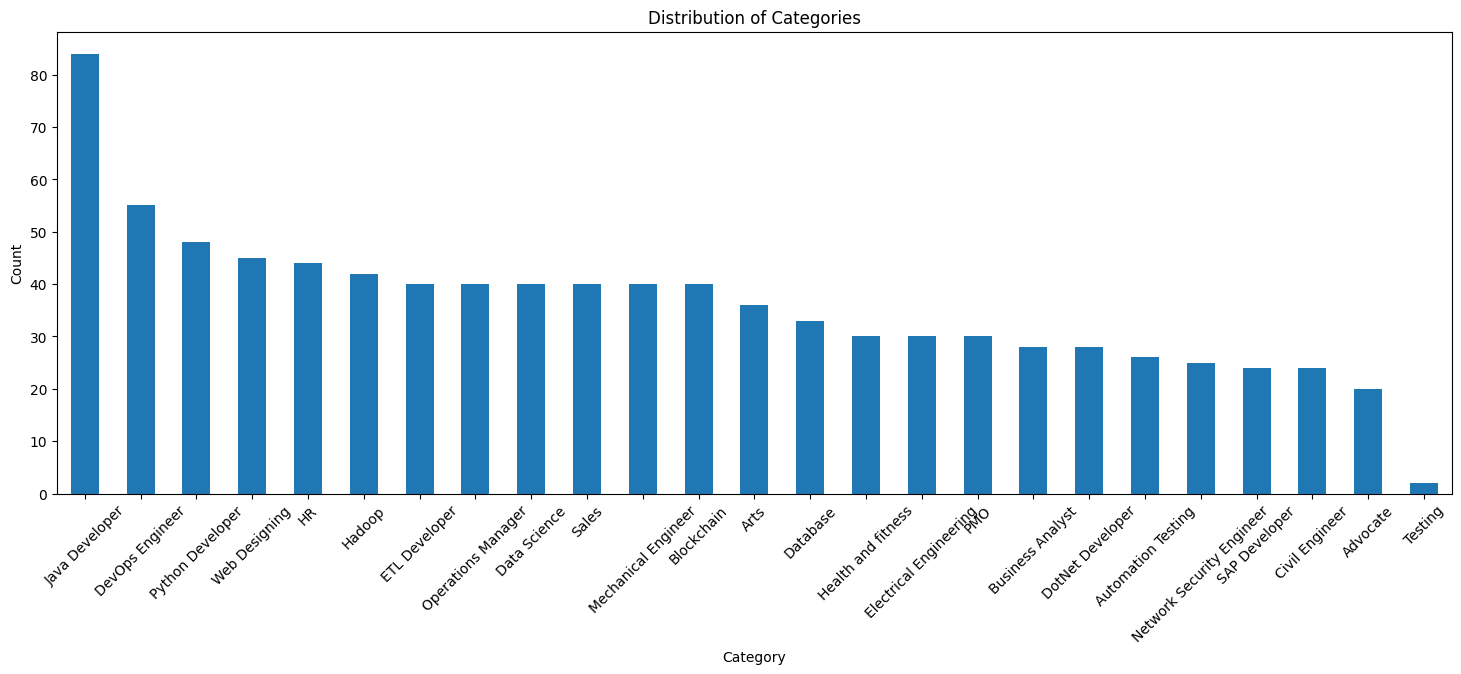

count      894.000000
mean      2586.826622
std       2324.078536
min        115.000000
25%        990.750000
50%       1986.000000
75%       3479.500000
max      11500.000000
Name: resume_length, dtype: float64


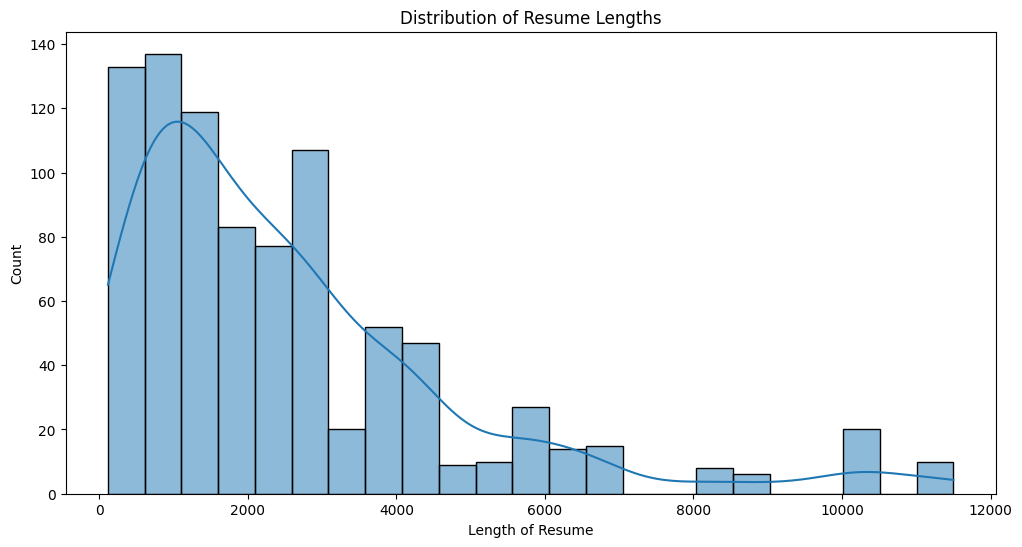

In [ ]:

category_counts = df['Category'].value_counts()
plt.figure(figsize=(18, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

df['resume_length'] = df['filtered_resume'].str.len()
print(df['resume_length'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(df['resume_length'], kde=True)
plt.title('Distribution of Resume Lengths')
plt.xlabel('Length of Resume')
plt.show()

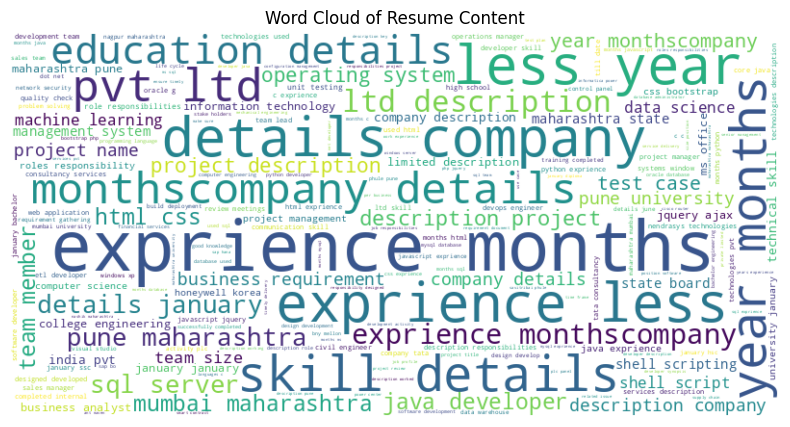

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


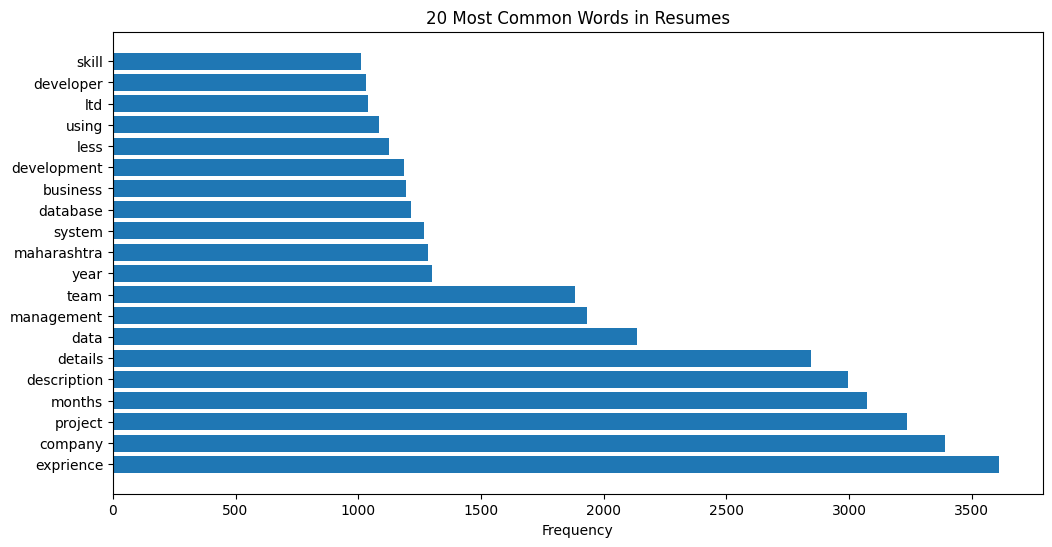

In [ ]:
all_text = ' '.join(df['filtered_resume'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Resume Content')
plt.show()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

words = all_text.lower().split()
word_freq = Counter(word for word in words if word not in stop_words)

plt.figure(figsize=(12, 6))
word_freq.most_common(20)[::-1]
plt.barh(*zip(*word_freq.most_common(20)))
plt.title('20 Most Common Words in Resumes')
plt.xlabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

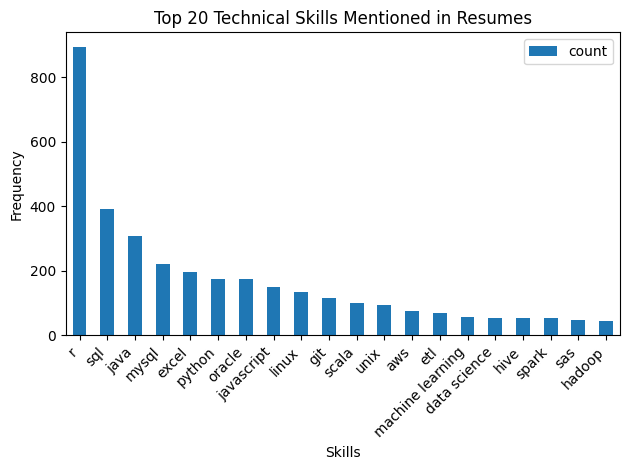

                       count
r                        894
sql                      392
java                     308
mysql                    221
excel                    197
python                   176
oracle                   175
javascript               151
linux                    134
git                      117
scala                    102
unix                      93
aws                       77
etl                       68
machine learning          56
data science              55
hive                      55
spark                     54
sas                       48
hadoop                    46
numpy                     44
big data                  39
azure                     39
postgresql                39
mongodb                   36
tableau                   29
pandas                    20
deep learning             20
computer vision           20
business intelligence     16
nlp                       16
statistics                16
data analysis             12
docker        

In [ ]:

from collections import Counter
import re

tech_skills = [
    'python', 'r', 'java', 'c++', 'javascript', 'sql', 'nosql', 'mongodb',
    'mysql', 'postgresql', 'oracle', 'spark', 'hadoop', 'hive', 'tableau',
    'power bi', 'excel', 'sas', 'pandas', 'numpy', 'scikit-learn', 'tensorflow',
    'keras', 'pytorch', 'machine learning', 'deep learning', 'nlp', 'computer vision',
    'data visualization', 'statistics', 'a/b testing', 'git', 'docker', 'kubernetes',
    'aws', 'azure', 'gcp', 'linux', 'unix', 'scala', 'data mining', 'etl',
    'big data', 'data warehousing', 'data modeling', 'data analysis',
    'business intelligence', 'data science'
]


def count_skills(text):
    text = text.lower()
    return Counter(skill for skill in tech_skills if skill in text)


skill_counts = df['filtered_resume'].apply(count_skills).sum()

skill_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['count']).sort_values('count', ascending=False)


plt.figure(figsize=(12, 8))
skill_df.head(20).plot(kind='bar')
plt.title('Top 20 Technical Skills Mentioned in Resumes')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(skill_df)

<Figure size 1200x800 with 0 Axes>

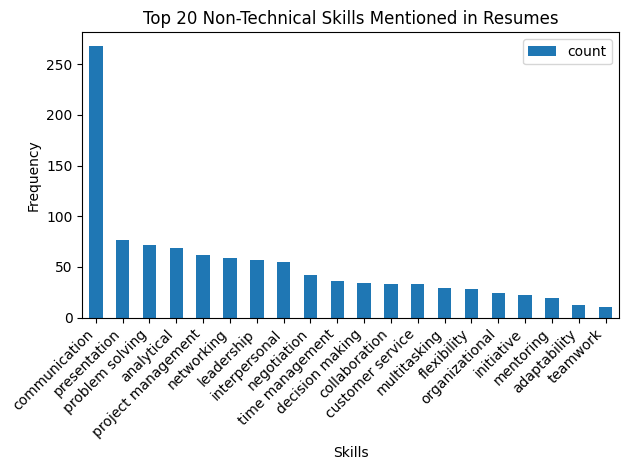

                     count
communication          268
presentation            77
problem solving         72
analytical              69
project management      62
networking              59
leadership              57
interpersonal           55
negotiation             42
time management         36
decision making         34
collaboration           33
customer service        33
multitasking            29
flexibility             28
organizational          24
initiative              22
mentoring               19
adaptability            12
teamwork                10
strategic thinking      10
critical thinking        8
conflict resolution      6
creativity               5
work ethic               4


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

non_tech_skills = [
    'communication', 'teamwork', 'leadership', 'problem solving',
    'critical thinking', 'time management', 'creativity', 'adaptability',
    'collaboration', 'interpersonal', 'presentation', 'project management',
    'organizational', 'decision making', 'conflict resolution', 'emotional intelligence',
    'negotiation', 'flexibility', 'multitasking', 'attention to detail',
    'self-motivation', 'work ethic', 'customer service', 'analytical',
    'strategic thinking', 'initiative', 'resilience', 'goal-oriented',
    'networking', 'mentoring'
]


def count_non_tech_skills(text):
    text = text.lower()
    return Counter(skill for skill in non_tech_skills if skill in text)

non_tech_skill_counts = df['filtered_resume'].apply(count_non_tech_skills).sum()


non_tech_skill_df = pd.DataFrame.from_dict(non_tech_skill_counts, orient='index', columns=['count']).sort_values('count', ascending=False)

plt.figure(figsize=(12, 8))
non_tech_skill_df.head(20).plot(kind='bar')
plt.title('Top 20 Non-Technical Skills Mentioned in Resumes')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(non_tech_skill_df)

In [ ]:
!pip install transformers torch datasets sklearn


  Using cached datasets-2.21.0-py3-none-any.whl.metadata (21 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Model Training

In [1]:

!pip install transformers datasets torch
import pandas as pd
from tqdm import tqdm
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW
from sklearn.model_selection import train_test_split
from tqdm import tqdm
train_data = pd.read_csv('train (1).csv')


train_data.rename(columns={'cleaned_resume': 'filtered_resume'}, inplace=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


categories = train_data['Category'].unique()
category_map = {category: idx for idx, category in enumerate(categories)}
train_data['label'] = train_data['Category'].map(category_map)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_data['filtered_resume'].tolist(),
    train_data['label'].tolist(),
    test_size=0.2,
    random_state=42
)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)


class ResumeDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ResumeDataset(train_encodings, train_labels)
val_dataset = ResumeDataset(val_encodings, val_labels)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(categories))
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)


def train(model, train_loader, val_loader, epochs=8):
    model.train()
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        loop = tqdm(train_loader, leave=True)

        for batch in loop:

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            loss.backward()
            optimizer.step()


            loop.set_description(f'Epoch {epoch+1}')
            loop.set_postfix(loss=loss.item())


        evaluate(model, val_loader)


def evaluate(model, val_loader):
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    for batch in val_loader:
        with torch.no_grad():
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            accuracy = (predictions == labels).cpu().numpy().mean() * 100
            total_eval_accuracy += accuracy
            total_eval_loss += loss.item()

    avg_val_accuracy = total_eval_accuracy / len(val_loader)
    avg_val_loss = total_eval_loss / len(val_loader)
    print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_accuracy:.2f}%")
    model.train()

train(model, train_loader, val_loader, epochs=8)
model.save_pretrained('Resume_fine_tuned_bert_model')
tokenizer.save_pretrained('Resumefine_tuned_bert_tokenizer')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/8


Epoch 1: 100%|██████████| 45/45 [01:03<00:00,  1.41s/it, loss=3.01]


Validation Loss: 2.9825, Validation Accuracy: 21.35%
Epoch 2/8


Epoch 2: 100%|██████████| 45/45 [01:06<00:00,  1.47s/it, loss=2.16]


Validation Loss: 2.2541, Validation Accuracy: 54.69%
Epoch 3/8


Epoch 3: 100%|██████████| 45/45 [01:05<00:00,  1.46s/it, loss=1.5]


Validation Loss: 1.5325, Validation Accuracy: 80.90%
Epoch 4/8


Epoch 4: 100%|██████████| 45/45 [01:05<00:00,  1.46s/it, loss=1.02]


Validation Loss: 0.9285, Validation Accuracy: 98.44%
Epoch 5/8


Epoch 5: 100%|██████████| 45/45 [01:05<00:00,  1.46s/it, loss=0.535]


Validation Loss: 0.5914, Validation Accuracy: 99.48%
Epoch 6/8


Epoch 6: 100%|██████████| 45/45 [01:05<00:00,  1.46s/it, loss=0.429]


Validation Loss: 0.3694, Validation Accuracy: 99.48%
Epoch 7/8


Epoch 7: 100%|██████████| 45/45 [01:05<00:00,  1.46s/it, loss=0.265]


Validation Loss: 0.2531, Validation Accuracy: 99.48%
Epoch 8/8


Epoch 8: 100%|██████████| 45/45 [01:05<00:00,  1.46s/it, loss=0.204]


Validation Loss: 0.1954, Validation Accuracy: 99.48%


('Resumefine_tuned_bert_tokenizer/tokenizer_config.json',
 'Resumefine_tuned_bert_tokenizer/special_tokens_map.json',
 'Resumefine_tuned_bert_tokenizer/vocab.txt',
 'Resumefine_tuned_bert_tokenizer/added_tokens.json')

In [9]:
from sklearn.metrics import classification_report, accuracy_score
label_encoder = LabelEncoder()
label_encoder.fit(train_data['Category'])
categories = label_encoder.classes_
def evaluate_model(model, val_loader):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())


    print(f"Number of classes in label encoder: {len(categories)}")
    print(f"Unique labels in predictions: {len(set(predictions))}")


    unique_true_labels = sorted(set(true_labels))
    categories_to_use = [categories[i] for i in unique_true_labels]


    report = classification_report(true_labels, predictions, target_names=categories_to_use, digits=4)
    accuracy = accuracy_score(true_labels, predictions)

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)


evaluate_model(model, val_loader)


Number of classes in label encoder: 25
Unique labels in predictions: 24
Accuracy: 0.9944
Classification Report:
                            precision    recall  f1-score   support

                 Advocate     1.0000    1.0000    1.0000         8
                     Arts     1.0000    1.0000    1.0000        13
       Automation Testing     1.0000    1.0000    1.0000         4
               Blockchain     1.0000    1.0000    1.0000         6
         Business Analyst     1.0000    1.0000    1.0000         4
           Civil Engineer     1.0000    1.0000    1.0000        11
             Data Science     1.0000    1.0000    1.0000         6
                 Database     1.0000    1.0000    1.0000         9
          DevOps Engineer     1.0000    1.0000    1.0000         7
         DotNet Developer     1.0000    1.0000    1.0000        18
            ETL Developer     1.0000    1.0000    1.0000         5
   Electrical Engineering     1.0000    1.0000    1.0000         6
               

In [12]:
y_pred = []
y_true = []
model.eval()


for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    _, preds = torch.max(outputs.logits, dim=1)

    y_pred.extend(preds.cpu().numpy())
    y_true.extend(labels.cpu().numpy())


predicted_classes = set(y_pred)


all_classes = set(range(len(label_encoder.classes_)))

missing_class = all_classes - predicted_classes

if missing_class:
    print(f"Missing class: {label_encoder.inverse_transform(list(missing_class))}")
else:
    print("No missing classes!")


Missing class: ['Web Designing']


In [13]:
print(train_data['Category'].value_counts())


Category
Java Developer               84
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Blockchain                   40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Testing                       2
Name: count, dtype: int64


In [25]:

train_data = pd.read_csv('train (1).csv')


print(train_data.columns)


Index(['Category', 'cleaned_resume'], dtype='object')


In [26]:
import pandas as pd


train_data = pd.read_csv('train (1).csv')


categories = train_data['Category'].unique()
category_map = {category: idx for idx, category in enumerate(categories)}
train_data['label'] = train_data['Category'].map(category_map)

print(train_data.head())


       Category                                     cleaned_resume  label
0  Data Science  skills programming languages python pandas num...      0
1  Data Science  education details may may uitrgpv data scienti...      0
2  Data Science  areas interest deep learning control system de...      0
3  Data Science  skills r python sap hana tableau sap hana sql ...      0
4  Data Science  education details mca ymcaust faridabad haryan...      0


Modifying the Remaining 1 class

In [27]:

web_designing_data = train_data[train_data['Category'] == 'Web Designing']


other_classes_data = train_data[train_data['Category'] != 'Web Designing']
balanced_other_classes_data = other_classes_data.sample(n=len(web_designing_data))

fine_tune_data = pd.concat([web_designing_data, balanced_other_classes_data])


fine_tune_texts = fine_tune_data['cleaned_resume'].tolist()
fine_tune_labels = fine_tune_data['label'].tolist()


fine_tune_encodings = tokenize_function(fine_tune_texts)
fine_tune_dataset = ResumeDataset(fine_tune_encodings, fine_tune_labels)
fine_tune_loader = DataLoader(fine_tune_dataset, batch_size=16, shuffle=True)


In [28]:
from transformers import AdamW


optimizer = AdamW(model.parameters(), lr=1e-5)
def fine_tune(model, train_loader, epochs=4):
    model.train()
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        loop = tqdm(train_loader, leave=True)

        for batch in loop:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            loss.backward()
            optimizer.step()

            loop.set_description(f'Epoch {epoch+1}')
            loop.set_postfix(loss=loss.item())


    model.save_pretrained('Updated Fine tuned model for Resume bert_model')
    tokenizer.save_pretrained('update fine tunde model for resume bert_tokenizer')


fine_tune(model, fine_tune_loader, epochs=4)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4


Epoch 1: 100%|██████████| 6/6 [00:08<00:00,  1.37s/it, loss=0.161]


Epoch 2/4


Epoch 2: 100%|██████████| 6/6 [00:08<00:00,  1.37s/it, loss=0.159]


Epoch 3/4


Epoch 3: 100%|██████████| 6/6 [00:08<00:00,  1.39s/it, loss=0.127]


Epoch 4/4


Epoch 4: 100%|██████████| 6/6 [00:08<00:00,  1.41s/it, loss=0.188]


In [31]:

test_data = pd.read_csv('test_data.csv')


test_data['label'] = test_data['Category'].map(category_map)


test_texts = test_data['Resume'].tolist()
test_labels = test_data['label'].tolist()


test_encodings = tokenize_function(test_texts)
test_dataset = ResumeDataset(test_encodings, test_labels)
test_loader = DataLoader(test_dataset, batch_size=16)


In [33]:

unique_categories = test_data['Category'].unique()
print("Unique Categories in Test Data:", unique_categories)


Unique Categories in Test Data: ['Testing']


In [35]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch


model_path = 'Resume_fine_tuned_bert_model'
tokenizer_path = 'Resumefine_tuned_bert_tokenizer'

model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_path)
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('train (1).csv')


category_map = {
    'Java Developer': 0,
    'DevOps Engineer': 1,
    'Python Developer': 2,
    'Web Designing': 3,
    'HR': 4,
    'Hadoop': 5,
    'ETL Developer': 6,
    'Operations Manager': 7,
    'Data Science': 8,
    'Sales': 9,
    'Mechanical Engineer': 10,
    'Blockchain': 11,
    'Arts': 12,
    'Database': 13,
    'Health and fitness': 14,
    'Electrical Engineering': 15,
    'PMO': 16,
    'Business Analyst': 17,
    'DotNet Developer': 18,
    'Automation Testing': 19,
    'Network Security Engineer': 20,
    'SAP Developer': 21,
    'Civil Engineer': 22,
    'Advocate': 23,
    'Testing': 24
}


df['Category_ID'] = df['Category'].map(category_map)


train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['Category_ID'], random_state=42)


In [47]:
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class ResumeDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

max_len = 512
train_dataset = ResumeDataset(train_df['cleaned_resume'].tolist(), train_df['Category_ID'].tolist(), tokenizer, max_len)
val_dataset = ResumeDataset(val_df['cleaned_resume'].tolist(), val_df['Category_ID'].tolist(), tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [48]:
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class ResumeDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

max_len = 512
train_dataset = ResumeDataset(train_df['cleaned_resume'].tolist(), train_df['Category_ID'].tolist(), tokenizer, max_len)
val_dataset = ResumeDataset(val_df['cleaned_resume'].tolist(), val_df['Category_ID'].tolist(), tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)


In [50]:
from transformers import BertForSequenceClassification, AdamW
import torch
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(category_map))
model.to(device)


optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

def train(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    return avg_loss

# Validation function
def evaluate(model, val_loader, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            _, preds = torch.max(outputs.logits, dim=1)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    avg_loss = total_loss / len(val_loader)
    accuracy = correct / total
    return avg_loss, accuracy

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    val_loss, val_accuracy = evaluate(model, val_loader, device)
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")

# Save the fine-tuned model
model.save_pretrained('fine_tuned_model')
tokenizer.save_pretrained('fine_tuned_model')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3
Training Loss: 3.1161
Validation Loss: 2.8444
Validation Accuracy: 0.2346
Epoch 2/3
Training Loss: 2.6090
Validation Loss: 2.2176
Validation Accuracy: 0.5642
Epoch 3/3
Training Loss: 1.9088
Validation Loss: 1.4698
Validation Accuracy: 0.9050


('fine_tuned_model/tokenizer_config.json',
 'fine_tuned_model/special_tokens_map.json',
 'fine_tuned_model/vocab.txt',
 'fine_tuned_model/added_tokens.json')

In [55]:
def predict_category(resume_text):
    inputs = tokenizer(resume_text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=-1)
        predicted_class_id = torch.argmax(logits, dim=-1).item()

    predicted_category = reverse_category_map.get(predicted_class_id, "Unknown")
    return predicted_category


resume_text = "key skills planning strategizing presentation skill client relationship energy level enquiry generation achieving targets qualifications university marketing business studies preferred minimum three years related experience sales marketing sector problem solving analytical skills interpret sales performance market trend information proven ability motivate lead sales team experience developing marketing sales strategies excellent oral written communication skills plus good working knowledge microsoft office computer knowledge knowledge ms excel ms word ms powerpoint achievements interests played cricket national team maharashtra cricket association played regional level cricket tournament thee times school team worked sports secretary college annual meet worked volunteer road show poona college worked group leader college presentation interest learning various computers languages tricks techniques computer playing cricket personal information education details mba operations dr patil college bba marketing pune maharashtra poona college h c moledina high school jr college c maharashtra board amvhigh school sales manager sales manager skill details sales exprience months marketing exprience months sales team exprience months sales exprience months excel exprience monthscompany details company f fun fitness description set individual sales targets sales team handling enquiries generating new enquiries set individual sales targets sales team continuously managing team performance managing staff training requirements generate timely sales reports organizing seasonal promotions events supervise motivate staff holds regular meeting sales staff company golds gym india pvt ltd description job profile set individual sales targets sales team handling enquiries generating new enquiries set individual sales targets sales team continuously managing team performance managing staff training requirements generate timely sales reports organizing seasonal promotions events supervise motivate staff holds regular meeting sales staff company description achievements joined sales associate promoted sales manager exceeded sales targets high level contribution dedication organization applauded best sales marketing performance pune zone awarded certificate excellence outstanding performance year ranked sales manager recognized superior performance twotime district employee month honoree job profile build strategies develop marketing initiative create awareness company services propose execute promotional programme attract clients working team four six people thereby ensuring targets defined achieved arrange necessary possible facilities information desk manages personal develops sales roles support staff reviews progress sales roles throughout company determine price schedules discount rate generate timely sales reports control expenses monitor budgets company talwalkars aspire fitness pvt ltd description company talwalkars aspire fitness pvt ltd description"
predicted_category = predict_category(resume_text)
print(f"Predicted Category: {predicted_category}")


Predicted Category: Sales


In [56]:
pip install transformers


In [58]:
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [59]:
from transformers import BertTokenizer, BertForSequenceClassification


model_save_path = "fine_tuned_model"


model = BertForSequenceClassification.from_pretrained("fine_tuned_model")

model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)


('fine_tuned_model/tokenizer_config.json',
 'fine_tuned_model/special_tokens_map.json',
 'fine_tuned_model/vocab.txt',
 'fine_tuned_model/added_tokens.json')

In [60]:
from huggingface_hub import HfApi


api = HfApi()


repo_name = 'jerry124/Resume_Classifier'

api.upload_folder(
    folder_path=model_save_path,
    repo_id=repo_name,
    repo_type="model",
    commit_message="Initial commit of fine-tuned Resume Classifier model"
)


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jerry124/Resume_Classifier/commit/075bd41acc014f2c35e5a8a41a7a9a4ad87a039a', commit_message='Initial commit of fine-tuned Resume Classifier model', commit_description='', oid='075bd41acc014f2c35e5a8a41a7a9a4ad87a039a', pr_url=None, pr_revision=None, pr_num=None)

In [62]:
push_to_hub = True
if push_to_hub:
    model.push_to_hub('jerry124/Resume_Classifier')
